# YouTube

In [2]:
import pandas as pd
import json
from utils import translate_time
from datetime import datetime

with open('data/youtube.json', 'r') as file:
    df = pd.json_normalize(json.loads(file.read()))

df['timestamp'] = df['timestamp'].apply(translate_time)
df['timestamp'] = pd.to_datetime( df['timestamp'], format='%d%b%Y %H:%M:%S', errors='coerce')
df['date'] = pd.to_datetime( df['timestamp'].dt.date, format='%Y-%m-%d')
df = df[ df['channel'] != 'Modificati TV']
df

,title,channel,timestamp,date
0,GARAGE GANG - LA FESTA DI INTERNET,KAI ;S COLLECTION,2021-08-29 11:29:39,2021-08-29
1,GARAGE GANG - SCIROPPO COVER (Prod. GARAGEGANG),GARAGE GANG,2021-08-29 11:28:42,2021-08-29
2,Pippo Sowlo - paracetafoco,Martin Squeeze,2021-08-29 11:28:41,2021-08-29
3,Grammer Nazi,That Look,2021-08-29 11:08:47,2021-08-29
4,Docter Evil tells scott to Zip it,RockinDay,2021-08-29 11:07:12,2021-08-29
...,...,...,...,...
56417,Europa League 2018 2019 Group I Besiktas Genk,Roberto260977 PES,2019-06-15 20:05:34,2019-06-15
56418,Serie A Stagione 1929-1930 Juventus-Napoli,Roberto260977 PES,2019-06-15 20:04:50,2019-06-15
56419,YouTube Fa Cagare RISPONDE ai The Show in dire...,Cerbero Podcast ARCHIVIO,2019-06-15 15:22:42,2019-06-15
56420,MY Craft: IL RITORNO DI MINECRAFT,Quei Due Sul Gaming,2019-06-15 15:17:17,2019-06-15


                                channel  views
355   Aldo Giovanni e Giacomo Ufficiale    787
5328                         MarcusKron    712
8053                              Surry    687
1416                    Cerbero Podcast    630
4444                  Ketama126 - Topic    468
...                                 ...    ...
6328                          OrangeGuy     21
6967                       RealLifeLore     21
9949                        dojacatVEVO     21
6901                 Random Clip Italia     21
3046             Frederick Frankenstein     21

[389 rows x 2 columns]


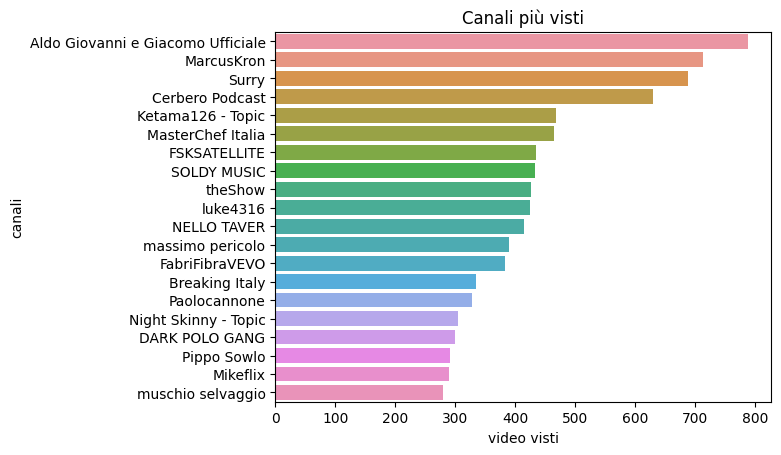

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

dff = df.copy()
dff = dff.groupby(['channel'])['channel'].count().reset_index(name='views')
dff = dff[dff['views'] > 20]
dff = dff.sort_values('views', ascending=False)
print(dff)
sns.barplot(data=dff.head(20), x="views", y='channel', orient='h').set(title="Canali più visti", xlabel="video visti", ylabel="canali")
plt.show()

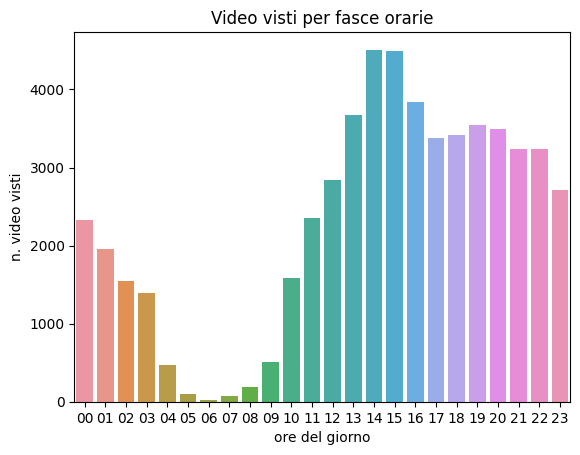

In [4]:
dff = df.copy()

def set_hours(hour):
    if 'nan' != str(hour):
        hour = str(hour)
        hour = hour[:-2]
        hour = hour if len(hour) == 2 else "0" + hour
        return hour

dff['timestamp'] = dff['timestamp'].dt.hour
dff['timestamp'] = dff['timestamp'].apply(set_hours)
dff = dff.groupby("timestamp").size().reset_index(name='count')
sns.barplot(data=dff, x="timestamp", y='count').set(title="Video visti per fasce orarie", ylabel="n. video visti", xlabel="ore del giorno")
plt.show()

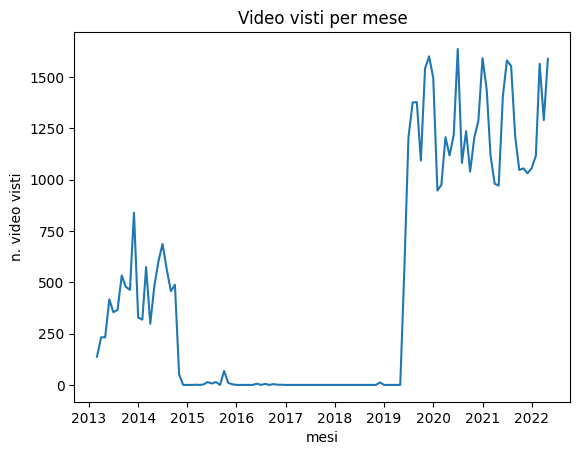

In [5]:
dff = df.copy()
dff['date'] = dff['date'].dt.to_period('M')
dff = dff.groupby('date').size().reset_index(name='total_of_the_month')

time_df = pd.DataFrame({'date': pd.date_range(start='2013-03', end='2022-06', freq='M')})
time_df['date'] = time_df['date'].dt.to_period('M')

dff = dff.merge(time_df, how='right', on='date')
dff['total_of_the_month'] = dff['total_of_the_month'].fillna(0)

def format_date(date):
    return datetime(date.year, date.month, 1)

dff['date'] = dff['date'].apply(format_date)
sns.lineplot(data=dff, x='date', y='total_of_the_month').set(title="Video visti per mese", ylabel="n. video visti", xlabel="mesi")
plt.show()


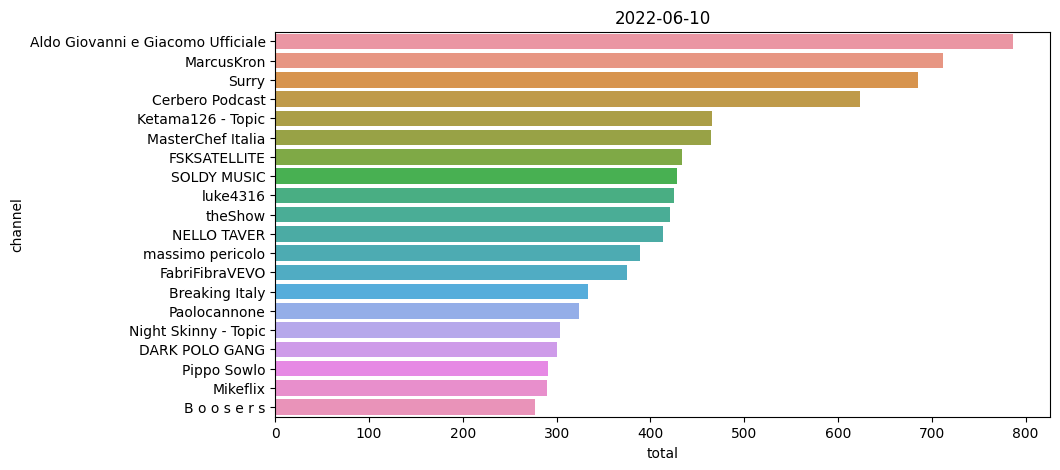

In [6]:
from dateutil.relativedelta import relativedelta
from matplotlib.animation import FuncAnimation, FFMpegWriter

def filter_data(df):
        all_data = []
        all_time = []
        start = datetime(2013, 4, 10)
        end = df['date'].max()

        while start <= end:
            all_time.append(start)
            query = df[ df['date'] < start ].groupby('channel')['channel'].count().reset_index(name='total').sort_values('total', ascending=False).head(20)
            all_data.append(query)
            start = start + relativedelta(months=1)

        return all_data, all_time
    
def get_data(n):
    return all_df[n]

all_df, all_time = filter_data(df)

fig = plt.figure(figsize=(10,5))

def animate(i):
    plt.cla()
    next_data = all_df[i]
    bp = sns.barplot(data=next_data, x='total', y='channel').set(title=all_time[i].strftime("%Y-%m-%d"))

plt.ioff()
animation = FuncAnimation(fig, animate, frames=len(all_df), repeat=False, interval=200)
from IPython.display import HTML
HTML(animation.to_html5_video())


# Tik Tok

In [7]:
with open('data/tiktok.json', 'r', encoding='utf-8') as file:
    data = json.loads(file.read())       
    data = data['Activity']['Video Browsing History']['VideoList']

df = pd.json_normalize(data)
df = df.rename({'Date':'timestamp'}, axis='columns')
df['timestamp'] = pd.to_datetime( df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df['date'] = pd.to_datetime( df['timestamp'].dt.date, format='%Y-%m-%d')
df = df.dropna()
df

,timestamp,VideoLink,date
0,2022-06-14 15:34:49,https://www.tiktokv.com/share/video/6848580369...,2022-06-14
1,2022-06-14 15:31:48,https://www.tiktokv.com/share/video/7108022611...,2022-06-14
2,2022-06-13 13:28:54,https://www.tiktokv.com/share/video/7084911497...,2022-06-13
3,2022-06-13 13:28:44,https://www.tiktokv.com/share/video/7108073769...,2022-06-13
4,2022-06-13 13:28:15,https://www.tiktokv.com/share/video/7107576603...,2022-06-13
...,...,...,...
19846,2021-12-18 23:47:50,https://www.tiktokv.com/share/video/7042753173...,2021-12-18
19847,2021-12-18 23:47:47,https://www.tiktokv.com/share/video/7043004487...,2021-12-18
19848,2021-12-18 23:47:45,https://www.tiktokv.com/share/video/7042753173...,2021-12-18
19849,2021-12-18 23:47:43,https://www.tiktokv.com/share/video/7040589223...,2021-12-18


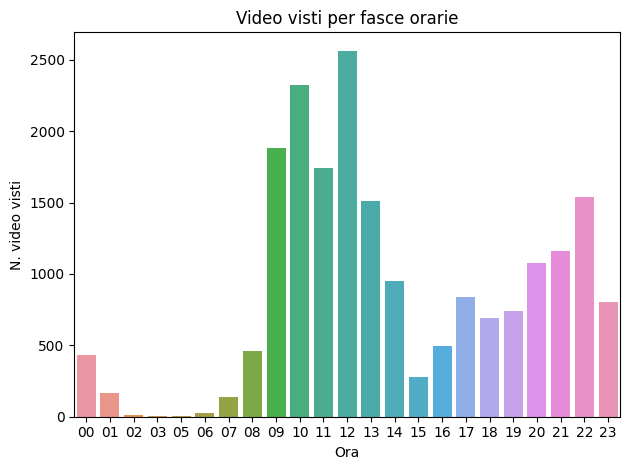

In [12]:

def set_hours(hour):
    time = str(hour)
    if len(time) == 1:
        time = '0' + time
    return time

dff = df.copy()
dff['timestamp'] = dff['timestamp'].dt.hour
dff['timestamp'] = dff['timestamp'].apply(set_hours)

dff = dff.groupby("timestamp").size().reset_index(name='count')
plt.ion()
sns.barplot(data=dff, x="timestamp", y="count", orient='v').set(title='Video visti per fasce orarie', ylabel='N. video visti', xlabel='Ora')
plt.tight_layout()
plt.show()

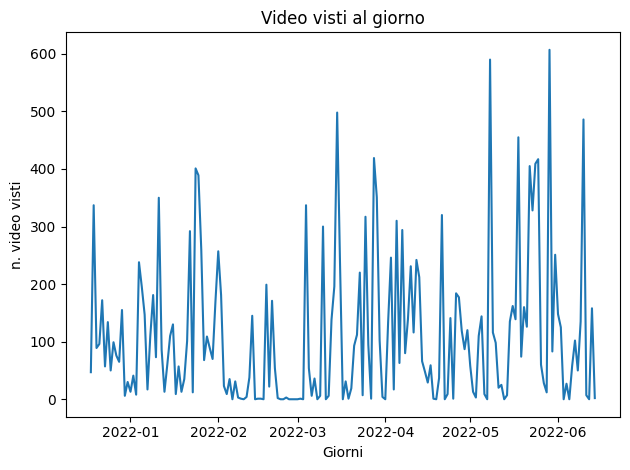

In [9]:
dff = df.copy()
dff = dff.groupby('date').size().reset_index(name='total_of_the_day')

#Add rows with empty days with 0 as total videos watched
dtr = pd.date_range(dff['date'].min(), dff['date'].max(), freq='D').to_frame(name='date')
dff = dff.merge(dtr, how='right', on='date').fillna(0)
sns.lineplot(data=dff, x='date', y='total_of_the_day').set(title="Video visti al giorno", ylabel="n. video visti", xlabel='Giorni')
plt.tight_layout()
